# Imports & Merging

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from tld import get_tld
import warnings
import re
import os
plt.rcParams['figure.dpi'] = 300


In [2]:
# Counts the number of available websites in the dataset, before cleanup.
path = 'data\csv\\'
files = [file for file in os.listdir(path) if file.endswith(".csv")]

output = pd.Series(name="Rows", dtype=int)
for file in files:
    df = pd.read_csv(os.path.join(path, file))
    output.at[file.replace(".csv", "")] = df.shape[0]
output.at["Total"] = output.sum()

In [3]:
output

database0-500            436
database1000-2000        865
database10000-10200      147
database10200-10300       84
database10300-10400       81
                       ...  
database9600-9700         82
database9700-9800         81
database9800-9900         80
database9900-10000        77
Total                  52422
Name: Rows, Length: 359, dtype: int64

In [4]:
# Combines all csv files in data\csv\ into one dataframe.
warnings.filterwarnings('ignore') # to ignore a useless deprecated method warning
result = Path('data\csv\\').glob('*.csv')
csvfiles = sorted(result, key = lambda x: [int(k) if k.isdigit() else k for k in re.split('([0-9]+)', x.stem)])

df = pd.DataFrame()
for files in csvfiles:
    df = df.append(pd.read_csv(files))
df.to_csv('data\datasets\main.csv')

In [5]:
df

,URL,Green Hosting,Bytes,Cleaner Than %,Stats_Adjusted Bytes,Stats_Energy,Stats_CO2_Grid_Grams,Stats_CO2_Grid_Litres,Stats_CO2_Renewable_Grams,Stats_CO2_Renewable_Litres
https://www.google.com/,True,170821,0.96,1.289699e+05,0.000097,0.043003,0.023918,0.037282,0.020736,1651677726
https://www.youtube.com/,True,3543405,0.32,2.675271e+06,0.002018,0.892021,0.496142,0.773354,0.430140,1651668187
https://www.facebook.com/,True,435816,0.91,3.290411e+05,0.000248,0.109713,0.061022,0.095118,0.052904,1651677735
https://www.netflix.com/fr-en/,True,2004776,0.54,1.513606e+06,0.001142,0.504685,0.280706,0.437546,0.243363,1651677748
https://www.microsoft.com/fr-fr/,unknown,768548,0.80,5.802537e+05,0.000438,0.193475,0.107611,0.167737,0.093295,1651677764
...,...,...,...,...,...,...,...,...,...,...
https://genericsildenafil.online/,True,35581,0.99,2.686365e+04,0.000020,0.008957,0.004982,0.007766,0.004319,1653145171
https://www.myamcat.com/,unknown,37919212,0.01,2.862901e+07,0.021597,9.545830,5.309390,8.275932,4.603073,1653145180
https://nobaproject.com/,True,1859882,0.57,1.404211e+06,0.001059,0.468209,0.260418,0.405922,0.225774,1653145161
https://govst.edu/,unknown,19112240,0.03,1.442974e+07,0.010885,4.811339,2.676067,4.171279,2.320065,1653145213


In [6]:
df = pd.read_csv('data\datasets\main.csv', index_col=None)

# Editing

In [7]:
#Basic cleanup, column renaming, dropping duplicates.

In [8]:
df.columns = ['URL', 'Green Hosting', 'Bytes', 'Cleaner Than %', "Statistics: Adjusted Bytes", "Statistics: Energy (KWG)", "Statistics: CO2 Grams, Grid", "Statistics: CO2 Litres, Grid", "Statistics: CO2 Grams, Renewable", "Statistics: CO2 Litres, Renewable", "Gathered At:"]

In [9]:
df = df.drop_duplicates(subset=['URL'], keep='first')

In [10]:
df.isna().sum()

URL                                  0
Green Hosting                        0
Bytes                                0
Cleaner Than %                       0
Statistics: Adjusted Bytes           0
Statistics: Energy (KWG)             0
Statistics: CO2 Grams, Grid          0
Statistics: CO2 Litres, Grid         0
Statistics: CO2 Grams, Renewable     0
Statistics: CO2 Litres, Renewable    0
Gathered At:                         0
dtype: int64

In [11]:
# There are no nulls/na's in the dataset.

In [12]:
# Converts to values between 0 and 100, originally it was between 0 and 1.
df["Cleaner Than %"] = df["Cleaner Than %"].apply(lambda x: x*100)

In [13]:
# Converts unix timestamp to datetime.
df["Gathered At:"] = pd.to_datetime(df['Gathered At:'], unit='s')

In [14]:
df.to_csv('data\datasets\main.csv')

In [15]:
# Small change for a website entry which is an ip address.
df.at[48594,'URL']='http://www.nontonanimeid.moe/'

In [16]:
# Used only to make a csv file which is used by get_requester to parse the websites.
df.iloc[0:5000].to_csv('data\datasets\\test_data.csv', index=False, header=False)

# Analysis

In [17]:
# Basic aanalysis of the data, some were for exploration purposes, others are used in the thesis.

In [18]:
df.describe()

,Bytes,Cleaner Than %,Statistics: Adjusted Bytes,Statistics: Energy (KWG),"Statistics: CO2 Grams, Grid","Statistics: CO2 Litres, Grid","Statistics: CO2 Grams, Renewable","Statistics: CO2 Litres, Renewable"
count,5.003400e+04,50034.000000,5.003400e+04,5.003400e+04,50034.000000,50034.000000,50034.000000,50034.000000
mean,3.696112e+06,49.154275,2.790564e+06,2.105122e-03,0.930464,0.517524,0.806683,0.448677
std,5.847474e+06,28.671194,4.414843e+06,3.330431e-03,1.472050,0.818754,1.276221,0.709834
min,1.680000e+02,0.000000,1.268400e+02,9.568445e-08,0.000042,0.000024,0.000037,0.000020
25%,1.055308e+06,25.000000,7.967572e+05,6.010507e-04,0.265664,0.147763,0.230323,0.128105
50%,2.236138e+06,46.000000,1.688285e+06,1.273593e-03,0.562928,0.313101,0.488041,0.271448
75%,4.229322e+06,73.000000,3.193138e+06,2.408812e-03,1.064695,0.592183,0.923057,0.513404
max,3.040842e+08,100.000000,2.295836e+08,1.731912e-01,76.550528,42.577404,66.366883,36.913260


In [19]:
df.mean()

Bytes                                3.696112e+06
Cleaner Than %                       4.915428e+01
Statistics: Adjusted Bytes           2.790564e+06
Statistics: Energy (KWG)             2.105122e-03
Statistics: CO2 Grams, Grid          9.304637e-01
Statistics: CO2 Litres, Grid         5.175239e-01
Statistics: CO2 Grams, Renewable     8.066826e-01
Statistics: CO2 Litres, Renewable    4.486769e-01
dtype: float64

In [20]:
df.median()

Bytes                                2.236138e+06
Cleaner Than %                       4.600000e+01
Statistics: Adjusted Bytes           1.688285e+06
Statistics: Energy (KWG)             1.273593e-03
Statistics: CO2 Grams, Grid          5.629283e-01
Statistics: CO2 Litres, Grid         3.131007e-01
Statistics: CO2 Grams, Renewable     4.880410e-01
Statistics: CO2 Litres, Renewable    2.714484e-01
dtype: float64

In [21]:
df.sum()

URL                                  https://www.google.com/https://www.youtube.com...
Green Hosting                        TrueTrueTrueTrueunknownTrueunknownunknownunkno...
Bytes                                                                     184931250547
Cleaner Than %                                                               2459385.0
Statistics: Adjusted Bytes                                         139623094162.984985
Statistics: Energy (KWG)                                                    105.327653
Statistics: CO2 Grams, Grid                                               46554.822635
Statistics: CO2 Litres, Grid                                               25893.79235
Statistics: CO2 Grams, Renewable                                          40361.556638
Statistics: CO2 Litres, Renewable                                         22449.097802
dtype: object

In [22]:
max = df["Statistics: Adjusted Bytes"].max()
df[df["Statistics: Adjusted Bytes"] == max]

,URL,Green Hosting,Bytes,Cleaner Than %,Statistics: Adjusted Bytes,Statistics: Energy (KWG),"Statistics: CO2 Grams, Grid","Statistics: CO2 Litres, Grid","Statistics: CO2 Grams, Renewable","Statistics: CO2 Litres, Renewable",Gathered At:
41527,https://lematin.ma/,True,304084175,0.0,2.295836e+08,0.173191,76.550528,42.577404,66.366883,36.91326,2022-05-15 12:40:01


In [23]:
min = df["Statistics: Adjusted Bytes"].min()
df[df["Statistics: Adjusted Bytes"] == min]

,URL,Green Hosting,Bytes,Cleaner Than %,Statistics: Adjusted Bytes,Statistics: Energy (KWG),"Statistics: CO2 Grams, Grid","Statistics: CO2 Litres, Grid","Statistics: CO2 Grams, Renewable","Statistics: CO2 Litres, Renewable",Gathered At:
40633,https://bloog.pl/,unknown,168,100.0,126.84,9.568445e-08,0.000042,0.000024,0.000037,0.00002,2022-05-15 10:05:15


In [24]:
# Used for the 'top and bottom 1000' section of the thesis.
dfmax = df.sort_values(['Bytes'], ascending=False).groupby('Bytes').tail(2)
dfmin = df.sort_values(['Bytes'], ascending=True).groupby('Bytes').tail(2)

In [25]:
# Used for the 'Hosting type' section of the thesis.
trues = df[df['Green Hosting'] == 'True']
unknowns = df[df['Green Hosting'] != 'True']
print(trues.URL.count())
print(unknowns.URL.count())

24326
25708


In [26]:
# This is the data used in the bigger table of that section. The 100 mil value is for the >=100mb column. 
# To get the >=50mb and the other values simply change to the needed value.
trues = trues[trues['Bytes'] >= 100000000]
print("Total MB, True:", trues.Bytes.sum() / 1e6)
print("Number of sites:", trues.Bytes.count())
print("Average: ", (trues.Bytes.sum() / 1e6) / trues.Bytes.count())

Total MB, True: 897.840743
Number of sites: 5
Average:  179.5681486


In [27]:
# Same goes for this part.
unknowns = unknowns[unknowns['Bytes'] >= 100000000]
print("Total MB, Unknown:", unknowns.Bytes.sum() / 1e6)
print("Number of sites:", unknowns.Bytes.count())
print("Average: ", (unknowns.Bytes.sum() / 1e6) / unknowns.Bytes.count())

Total MB, Unknown: 777.391624
Number of sites: 5
Average:  155.4783248


In [28]:
print("Total MB, entire dataset:", df['Bytes'].sum() /1e+6)
print("Mean MB:", df['Bytes'].mean() / 1e+6)
print("Median MB:", df['Bytes'].median() / 1e+6)
print(" ")
print("Total Energy:", df['Statistics: Energy (KWG)'].sum())
print("Mean Energy:", df['Statistics: Energy (KWG)'].mean())
print("Median Energy", df['Statistics: Energy (KWG)'].median())
print(" ")
print("Total CO2 Grams:", df['Statistics: CO2 Grams, Grid'].sum())
print("Mean Grams:", df['Statistics: CO2 Grams, Grid'].mean())
print("Median Grams:", df['Statistics: CO2 Grams, Grid'].median())

Total MB, entire dataset: 184931.250547
Mean MB: 3.69611165501459
Median MB: 2.2361385
 
Total Energy: 105.32765302063463
Mean Energy: 0.0021051215777398297
Median Energy 0.0012735933993709499
 
Total CO2 Grams: 46554.82263512154
Mean Grams: 0.9304637373610254
Median Grams: 0.562928282521991


# Tables

### For "Overview" & "Per Domain"

In [29]:
# Adds a new column with the TLD type.
df['tld'] = df['URL'].apply(lambda x: get_tld(x))

In [30]:
df['tld'] = df['tld'].astype(str)

In [111]:
# Used for a table mentioning all TLD's.
tld = df['tld'].value_counts()
tld.to_excel("data/datasets/tld.xlsx")

In [32]:
# Used in Data Analysis, Dataset Distribution
top3_tld_percentage = ((27873 + 3868 + 2065) / tld.sum()) *100
top3_tld_percentage

67.56605508254387

In [100]:
# Used in Energy and CO2, for density plots without outlers, using the default boxplot definition for an outlier https://medium.com/@agarwal.vishal819/outlier-detection-with-boxplots-1b6757fafa21#:~:text=This%20type%20of%20plot%20is%20used%20to%20easily%20detect%20outliers.%20It%20can%20also%20tell%20us%20if%20your%20data%20is%20symmetrical%2C%20how%20tightly%20your%20data%20is%20grouped%2C%20and%20if%20and%20how%20your%20data%20is%20skewed.

def IQR_outliers(df, column):

     Q1 = df[column].quantile(0.25)
     Q3 = df[column].quantile(0.75)
     IQR = Q3 - Q1
     df = df.loc[lambda df: ~((df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR)))]
     return df
    

revised_df = df.pipe(IQR_outliers, 'Statistics: CO2 Grams, Grid').pipe(IQR_outliers, 'Statistics: Energy (KWG)')

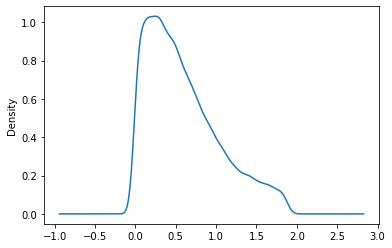

In [104]:
ax = revised_df["Statistics: CO2 Grams, Grid"].plot.kde()
plt.savefig('data/images/graphs/statistics_co2_no_outliers.png')

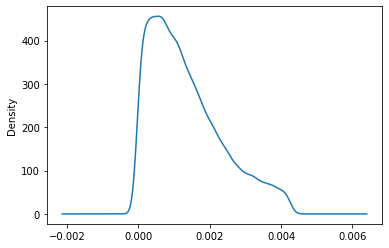

In [110]:
ax = revised_df["Statistics: Energy (KWG)"].plot.kde()
plt.savefig('data/images/graphs/statistics_energy_no_outliers.png')

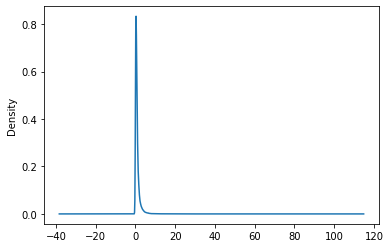

In [109]:
# Used for plots WITH outliers
ax = df["Statistics: CO2 Grams, Grid"].plot.kde()
plt.savefig('data/images/graphs/statistics_co2_with_outliers.png')

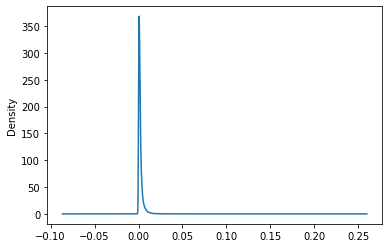

In [108]:
ax = df["Statistics: Energy (KWG)"].plot.kde()
plt.savefig('data/images/graphs/statistics_energy_with_outliers.png')

In [33]:
# List used for the overview section where the top 40 TLD's are plotted.
df1 = df.groupby('tld').filter(lambda d: len(d) > 100)

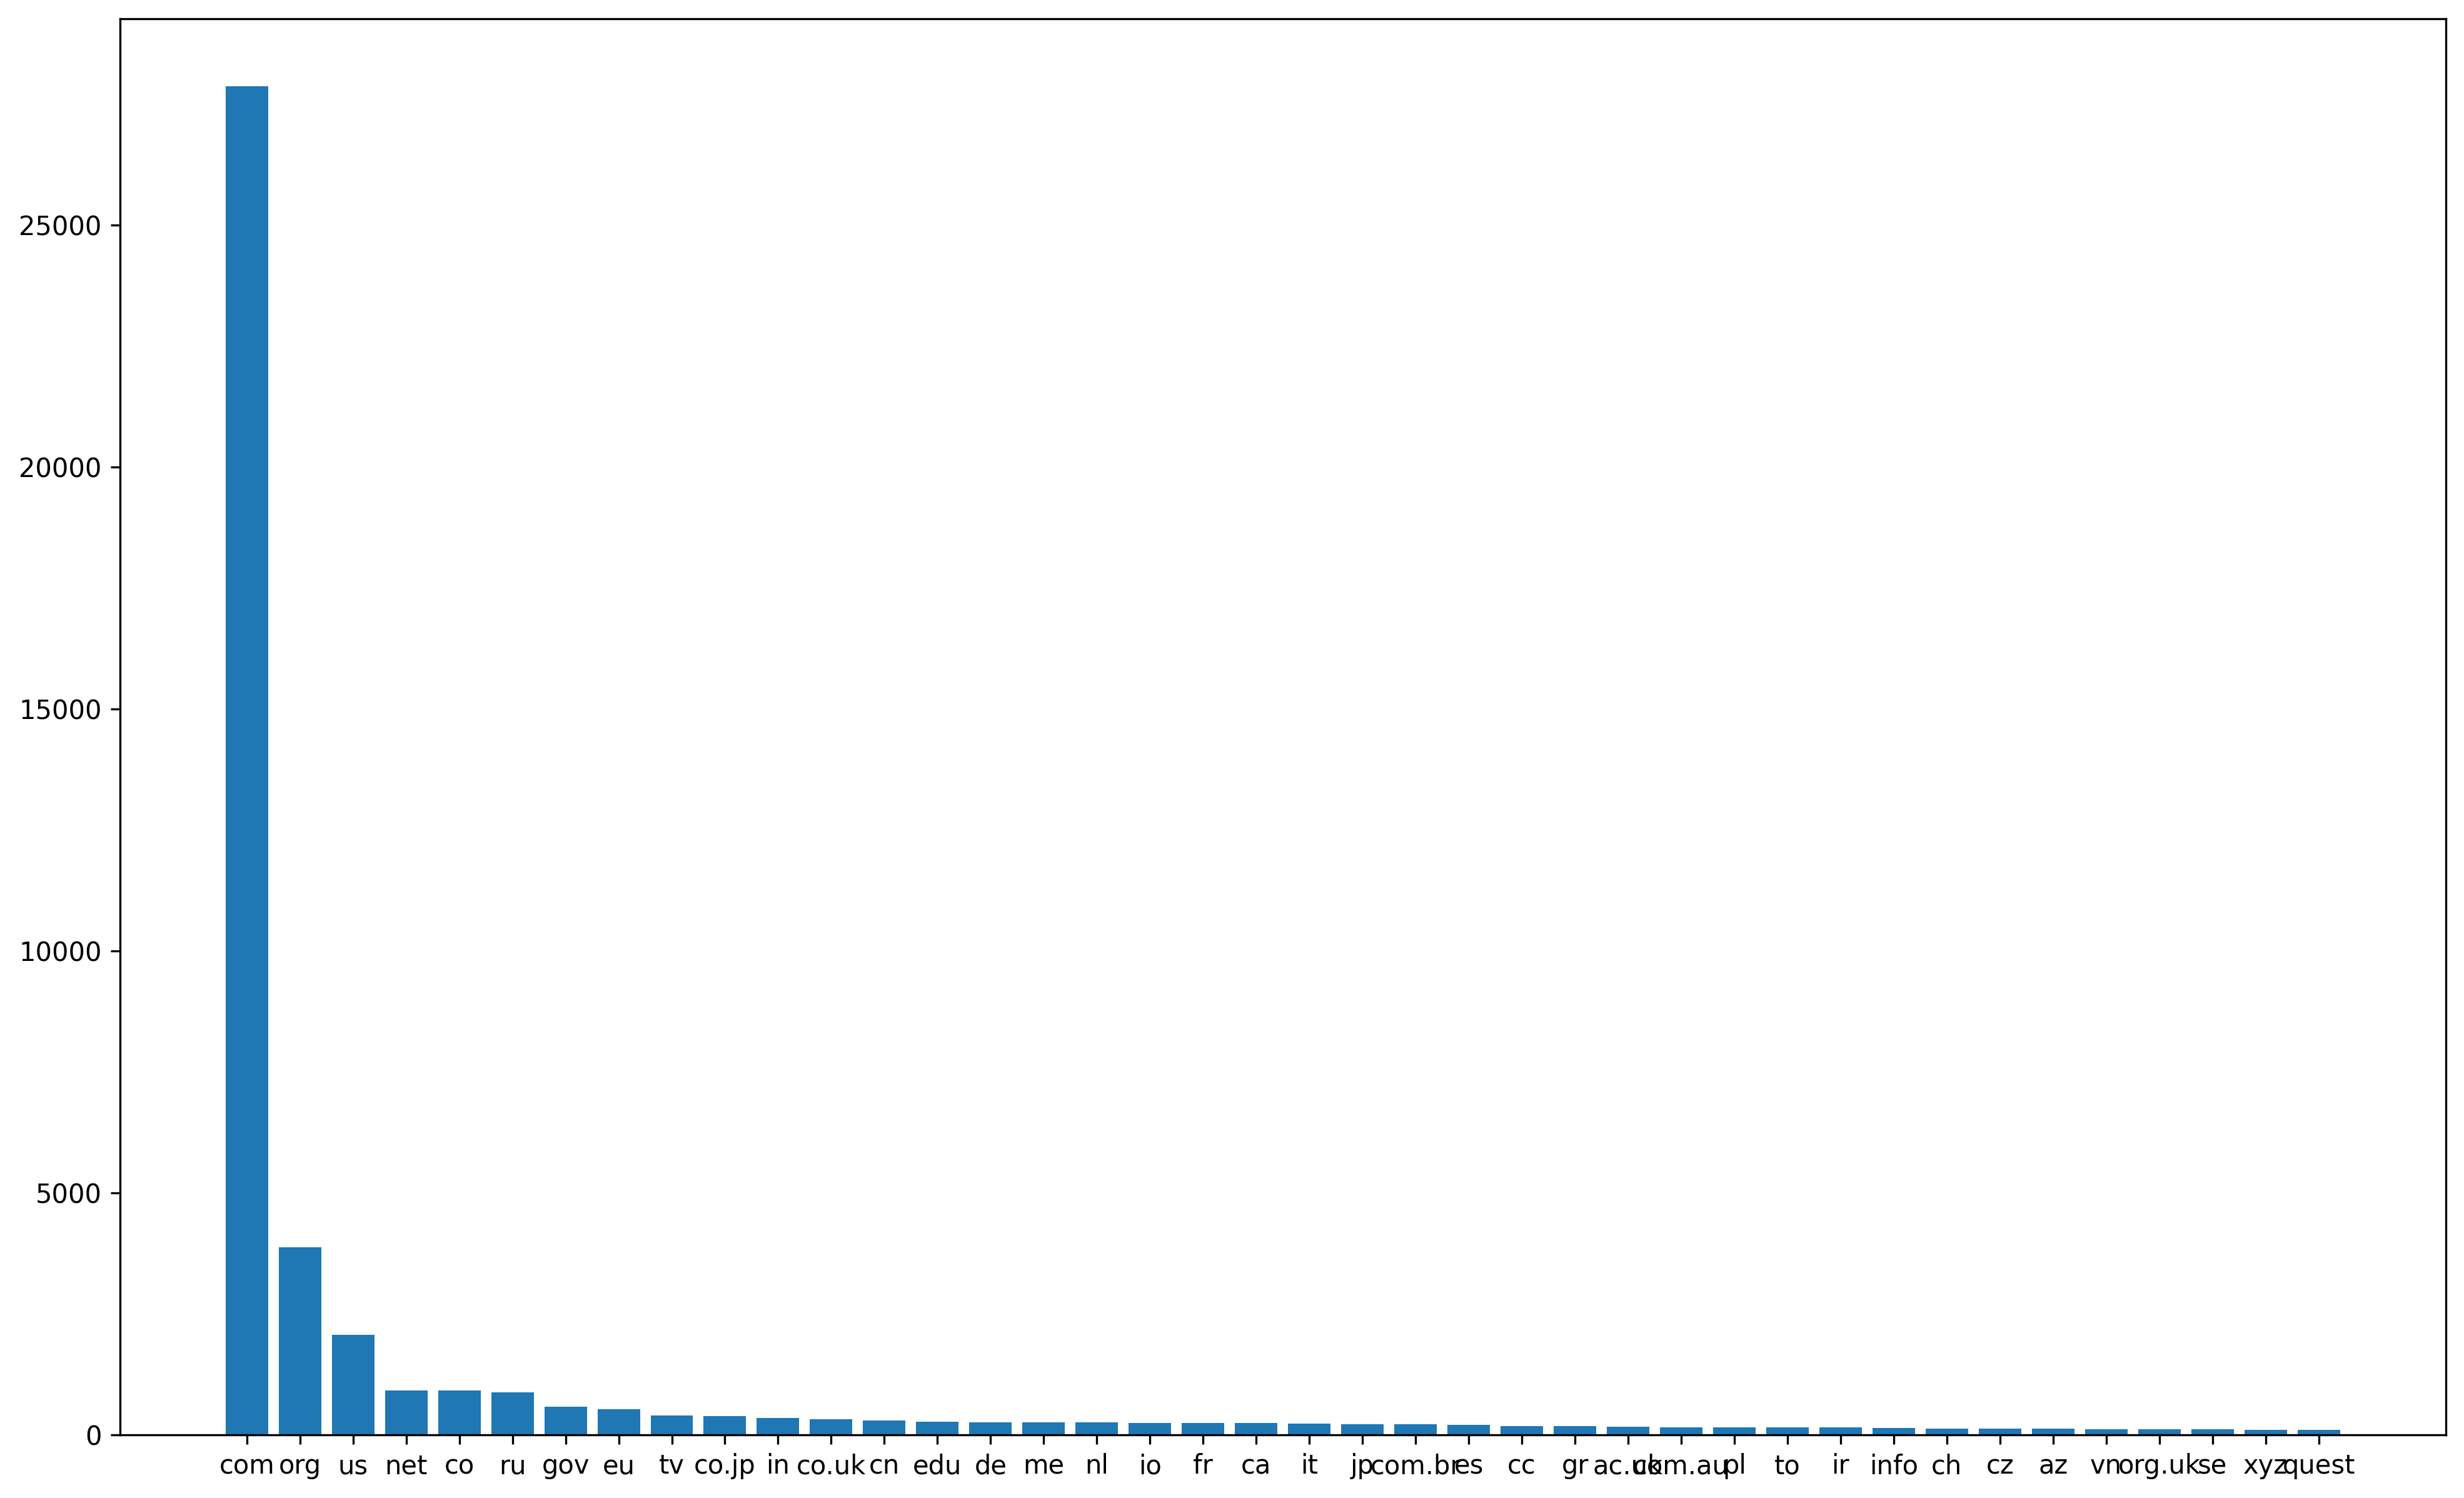

In [34]:
# Plot of the top 40.
plt.figure(figsize=(16,10), dpi=300)
height = df1["tld"].value_counts()
bars = df1["tld"].unique()
y_pos = np.arange(len(bars))
plt.bar(y_pos, height)
plt.xticks(y_pos, bars)
plt.savefig('data/images/graphs/tld_overview.png')
plt.show()

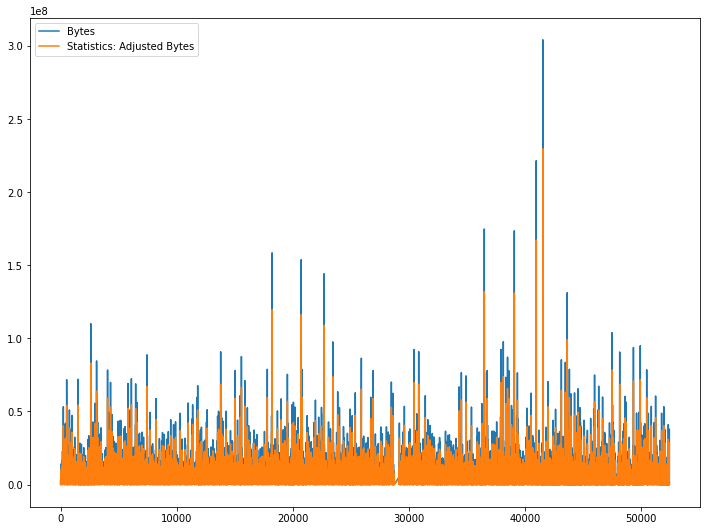

In [35]:
# Used for the 'Outliers' section of the thesis.
df[['Bytes', 'Statistics: Adjusted Bytes']].plot(figsize =(12, 9))
plt.savefig('data/images/graphs/bytes_and_adjusted_bytes.png')

In [36]:
# Used in Outliers section of the thesis.
print("Number of sites => 5mb:", len(df.loc[df['Bytes'] <= 5000000]))
print("Number of sites => 10mb:", len(df.loc[df['Bytes'] <= 10000000]))
print("Number of sites => 3.69mb:", len(df.loc[df['Bytes'] <= 3690000]))

Number of sites => 5mb: 40047
Number of sites => 10mb: 46692
Number of sites => 3.69mb: 35153


In [37]:
five = df.loc[df['Bytes'] <= 5000000]
ten = df.loc[df['Bytes'] <= 10000000]
three69 = df.loc[df['Bytes'] <= 3690000]

In [38]:
# Used in the 'Outliers' section of the thesis.
print(df.describe())
print(five.describe())
print(ten.describe())
print(three69.describe())

              Bytes  Cleaner Than %  Statistics: Adjusted Bytes  \
count  5.003400e+04    50034.000000                5.003400e+04   
mean   3.696112e+06       49.154275                2.790564e+06   
std    5.847474e+06       28.671194                4.414843e+06   
min    1.680000e+02        0.000000                1.268400e+02   
25%    1.055308e+06       25.000000                7.967572e+05   
50%    2.236138e+06       46.000000                1.688285e+06   
75%    4.229322e+06       73.000000                3.193138e+06   
max    3.040842e+08      100.000000                2.295836e+08   

       Statistics: Energy (KWG)  Statistics: CO2 Grams, Grid  \
count              5.003400e+04                 50034.000000   
mean               2.105122e-03                     0.930464   
std                3.330431e-03                     1.472050   
min                9.568445e-08                     0.000042   
25%                6.010507e-04                     0.265664   
50%         

In [39]:
print(df["Bytes"].max() / df["Bytes"].min())

1810024.8511904762


# Domains
### Original

In [40]:
# The following code is used only for the Domains section of the thesis.
# Splits the dataset in the original 7 TLD's for the section that talks about them. Then combines only those tld's into merged_original.
com = df[df['URL'].str.contains('.com/', regex = False)]
gov = df[df['URL'].str.contains('.gov/', regex = False)]
org = df[df['URL'].str.contains('.org/', regex = False)]
net = df[df['URL'].str.contains('.net/', regex = False)]
edu = df[df['URL'].str.contains('.edu/', regex = False)]
int = df[df['URL'].str.contains('.int/', regex = False)]
mil = df[df['URL'].str.contains('.mil/', regex = False)]
original = [com, gov, org, net, edu, int, mil]
merged_original = pd.concat(original)

In [41]:
merged_original['tld'] = merged_original['URL'].apply(lambda x: get_tld(x))
merged_original['tld'] = merged_original['tld'].astype(str)
merged_original['tld'].value_counts()

com                   27873
org                    3868
net                    2065
edu                     921
gov                     387
int                      24
mil                       5
eu.com                    2
uk.com                    2
js.org                    1
us.com                    1
bplaced.net               1
duckdns.org               1
freedesktop.org           1
de.com                    1
mp                        1
altervista.org            1
cn.com                    1
herokuapp.com             1
pagexl.com                1
africa.com                1
pythonanywhere.com        1
us.org                    1
Name: tld, dtype: int64

In [42]:
print("Bytes in .com, total, mean, median:")
print(com['Bytes'].sum() /1e+6)
print(com['Bytes'].mean() / 1e+6)
print(com['Bytes'].median() / 1e+6)
print("\nEnergy in .com, total, mean, median:")
print(com['Statistics: Energy (KWG)'].sum())
print(com['Statistics: Energy (KWG)'].mean())
print(com['Statistics: Energy (KWG)'].median())
print("\nCO2 in .com, total, mean, median:")
print(com['Statistics: CO2 Grams, Grid'].sum())
print(com['Statistics: CO2 Grams, Grid'].mean())
print(com['Statistics: CO2 Grams, Grid'].median())

Bytes in .com, total, mean, median:
103289.117019
3.704110346745562
2.264734

Energy in .com, total, mean, median:
58.82834970296177
0.0021096772351788333
0.001289879975561

CO2 in .com, total, mean, median:
26002.13056870969
0.9324773379490654
0.5701269491979852


In [43]:
print("Bytes in .org, total, mean, median:")
print(org['Bytes'].sum() /1e+6)
print(org['Bytes'].mean() / 1e+6)
print(org['Bytes'].median() / 1e+6)
print("\nEnergy in .org, total, mean, median:")
print(org['Statistics: Energy (KWG)'].sum())
print(org['Statistics: Energy (KWG)'].mean())
print(org['Statistics: Energy (KWG)'].median())
print("\nCO2 in .org, total, mean, median:")
print(org['Statistics: CO2 Grams, Grid'].sum())
print(org['Statistics: CO2 Grams, Grid'].mean())
print(org['Statistics: CO2 Grams, Grid'].median())

Bytes in .org, total, mean, median:
13521.251094
3.491157008520527
2.135848

Energy in .org, total, mean, median:
7.701032894230917
0.001988389593139922
0.0012164729129523

CO2 in .org, total, mean, median:
3403.856539250146
0.8788682001678663
0.5376810275249183


In [44]:
print("Bytes in .net, total, mean, median:")
print(net['Bytes'].sum() /1e+6)
print(net['Bytes'].mean() / 1e+6)
print(net['Bytes'].median() / 1e+6)
print("\nEnergy in .net, total, mean, median:")
print(net['Statistics: Energy (KWG)'].sum())
print(net['Statistics: Energy (KWG)'].mean())
print(net['Statistics: Energy (KWG)'].median())
print("\nCO2 in .net, total, mean, median:")
print(net['Statistics: CO2 Grams, Grid'].sum())
print(net['Statistics: CO2 Grams, Grid'].mean())
print(net['Statistics: CO2 Grams, Grid'].median())

Bytes in .net, total, mean, median:
5951.959027
2.8809095
1.4485755

Energy in .net, total, mean, median:
3.389940171466905
0.0016408229290740101
0.0008250366403022499

CO2 in .net, total, mean, median:
1498.3535557884143
0.725243734650733
0.364666195013607


In [45]:
print("Bytes in .edu, total, mean, median:")
print(edu['Bytes'].sum() /1e+6)
print(edu['Bytes'].mean() / 1e+6)
print(edu['Bytes'].median() / 1e+6)
print("\nEnergy in .edu, total, mean, median:")
print(edu['Statistics: Energy (KWG)'].sum())
print(edu['Statistics: Energy (KWG)'].mean())
print(edu['Statistics: Energy (KWG)'].median())
print("\nCO2 in .edu, total, mean, median:")
print(edu['Statistics: CO2 Grams, Grid'].sum())
print(edu['Statistics: CO2 Grams, Grid'].mean())
print(edu['Statistics: CO2 Grams, Grid'].median())

Bytes in .edu, total, mean, median:
6342.362961
6.88638757980456
4.84192

Energy in .edu, total, mean, median:
3.612294857203496
0.003922144253206836
0.0027577170878648

CO2 in .edu, total, mean, median:
1596.6343268839655
1.7335877599174436
1.2189109528362754


In [46]:
print("Bytes in .gov, total, mean, median:")
print(gov['Bytes'].sum() /1e+6)
print(gov['Bytes'].mean() / 1e+6)
print(gov['Bytes'].median() / 1e+6)
print("\nEnergy in .gov, total, mean, median:")
print(gov['Statistics: Energy (KWG)'].sum())
print(gov['Statistics: Energy (KWG)'].mean())
print(gov['Statistics: Energy (KWG)'].median())
print("\nCO2 in .gov, total, mean, median:")
print(gov['Statistics: CO2 Grams, Grid'].sum())
print(gov['Statistics: CO2 Grams, Grid'].mean())
print(gov['Statistics: CO2 Grams, Grid'].median())

Bytes in .gov, total, mean, median:
1351.431049
3.4920698940568475
2.397623

Energy in .gov, total, mean, median:
0.7697079870998205
0.001988909527389717
0.0013655669481027

CO2 in .gov, total, mean, median:
340.210930298129
0.8790980111062766
0.6035805910614319


In [47]:
print("Bytes in .int, total, mean, median:")
print(int['Bytes'].sum() /1e+6)
print(int['Bytes'].mean() / 1e+6)
print(int['Bytes'].median() / 1e+6)
print("\nEnergy in .int, total, mean, median:")
print(int['Statistics: Energy (KWG)'].sum())
print(int['Statistics: Energy (KWG)'].mean())
print(int['Statistics: Energy (KWG)'].median())
print("\nCO2 in .int, total, mean, median:")
print(int['Statistics: CO2 Grams, Grid'].sum())
print(int['Statistics: CO2 Grams, Grid'].mean())
print(int['Statistics: CO2 Grams, Grid'].median())

Bytes in .int, total, mean, median:
111.689961
4.653748375
3.2896505

Energy in .int, total, mean, median:
0.063613053084862
0.0026505438785359163
0.001873621496628

CO2 in .int, total, mean, median:
28.1169694635096
1.1715403943129001
0.8281407015095932


In [48]:
print("Bytes in .mil, total, mean, median:")
print(mil['Bytes'].sum() /1e+6)
print(mil['Bytes'].mean() / 1e+6)
print(mil['Bytes'].median() / 1e+6)
print("\nEnergy in .mil, total, mean, median:")
print(mil['Statistics: Energy (KWG)'].sum())
print(mil['Statistics: Energy (KWG)'].mean())
print(mil['Statistics: Energy (KWG)'].median())
print("\nCO2 in .mil, total, mean, median:")
print(mil['Statistics: CO2 Grams, Grid'].sum())
print(mil['Statistics: CO2 Grams, Grid'].mean())
print(mil['Statistics: CO2 Grams, Grid'].median())

Bytes in .mil, total, mean, median:
36.304155
7.260831
3.636081

Energy in .mil, total, mean, median:
0.020677043115952802
0.00413540862319056
0.0020709310989361

CO2 in .mil, total, mean, median:
9.139253057251219
1.8278506114502437
0.9153515457297676


<Figure size 4500x4500 with 0 Axes>

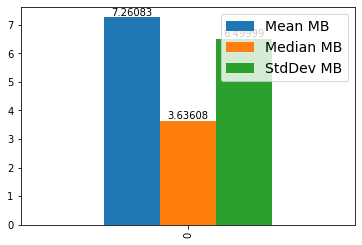

In [49]:
plt.figure(figsize=(15,15), dpi=300)
mean = (mil['Bytes'].mean() / 1e+6)
median = (mil['Bytes'].median() / 1e+6)
std = (mil['Bytes'].std() / 1e+6)
data = [mean, median, std]
dfmmms = pd.DataFrame(data)

ax = dfmmms.T.plot(kind='bar')
for container in ax.containers:
    ax.bar_label(container)
ax.legend(['Mean MB', 'Median MB', 'StdDev MB'], fontsize=14)
plt.savefig('data/images/graphs/tld_overview_bytes.png')
plt.show()

In [50]:
mil.Bytes.sum()

36304155

# Regional

In [51]:
# For the regional section, used the same way as the original TLD part.
eu = df[df['URL'].str.contains('.eu/', regex = False)] # EU
at = df[df['URL'].str.contains('.at/', regex = False)] # Austria
be = df[df['URL'].str.contains('.be/', regex = False)] # Belgium
bg = df[df['URL'].str.contains('.bg/', regex = False)] # Bulgaria
by = df[df['URL'].str.contains('.by/', regex = False)] # Belarus
hr = df[df['URL'].str.contains('.hr/', regex = False)] # Croatia
cy = df[df['URL'].str.contains('.cy/', regex = False)] # Cyprus
cz = df[df['URL'].str.contains('.cz/', regex = False)] # Czech Republic
de = df[df['URL'].str.contains('.de/', regex = False)] # Germany
gl = df[df['URL'].str.contains('.gl/', regex = False)] # Greenland
dk = df[df['URL'].str.contains('.dk/', regex = False)] # Denmark
ee = df[df['URL'].str.contains('.ee/', regex = False)] # Estonia
es = df[df['URL'].str.contains('.es/', regex = False)] # Spain
fi = df[df['URL'].str.contains('.fi/', regex = False)] # Finland
fr = df[df['URL'].str.contains('.fr/', regex = False)] # France
gr = df[df['URL'].str.contains('.gr/', regex = False)] # Greece
hu = df[df['URL'].str.contains('.hu/', regex = False)] # Hungary
ie = df[df['URL'].str.contains('.ie/', regex = False)] # Ireland
it = df[df['URL'].str.contains('.it/', regex = False)] # Italy
lv = df[df['URL'].str.contains('.lv/', regex = False)] # Latvia
lt = df[df['URL'].str.contains('.lt/', regex = False)] # Lithuania
lu = df[df['URL'].str.contains('.lu/', regex = False)] # Luxembourg
mt = df[df['URL'].str.contains('.mt/', regex = False)] # Malta
uk = df[df['URL'].str.contains('.uk/', regex = False)] # United Kingdom
gb = df[df['URL'].str.contains('.gb/', regex = False)] # Great Britain
nl = df[df['URL'].str.contains('.nl/', regex = False)] # Netherlands
pl = df[df['URL'].str.contains('.pl/', regex = False)] # Poland
pt = df[df['URL'].str.contains('.pt/', regex = False)] # Portugal
ro = df[df['URL'].str.contains('.ro/', regex = False)] # Romania
svk = df[df['URL'].str.contains('.sk/', regex = False)] # Slovakia
si = df[df['URL'].str.contains('.si/', regex = False)] # Slovenia
se = df[df['URL'].str.contains('.se/', regex = False)] # Sweden

europe = [eu, at, be, bg, by, hr, cz, de, dk, ee, es, fi, fr, gr, hu, ie, it, lv, lt, lu, mt, uk, gb, nl, pl, pt, ro, svk, si, se]
merged_eu = pd.concat(europe)

In [52]:
merged_eu.head(1)

,URL,Green Hosting,Bytes,Cleaner Than %,Statistics: Adjusted Bytes,Statistics: Energy (KWG),"Statistics: CO2 Grams, Grid","Statistics: CO2 Litres, Grid","Statistics: CO2 Grams, Renewable","Statistics: CO2 Litres, Renewable",Gathered At:,tld
55,https://european-union.europa.eu/select-langua...,unknown,235949,95.0,178141.495,0.000134,0.059398,0.033037,0.051496,0.028642,2022-05-04 15:24:23,eu


In [53]:
print("Bytes in EU, total, mean, median:")
print(merged_eu['Bytes'].sum() /1e+6)
print(merged_eu['Bytes'].mean() / 1e+6)
print(merged_eu['Bytes'].median() / 1e+6)
print("\nEnergy in EU, total, mean, median:")
print(merged_eu['Statistics: Energy (KWG)'].sum())
print(merged_eu['Statistics: Energy (KWG)'].mean())
print(merged_eu['Statistics: Energy (KWG)'].median())
print("\nCO2 in EU, total, mean, median:")
print(merged_eu['Statistics: CO2 Grams, Grid'].sum())
print(merged_eu['Statistics: CO2 Grams, Grid'].mean())
print(merged_eu['Statistics: CO2 Grams, Grid'].median())

Bytes in EU, total, mean, median:
14441.05796
3.2701671105072467
2.227436

Energy in EU, total, mean, median:
8.22490918956489
0.0018625247258978466
0.00126863688770675

CO2 in EU, total, mean, median:
3635.4098617877776
0.8232359288468699
0.5607375043664128


In [54]:
# For the NA part of 'Regional' in the thesis.
us = df[df['URL'].str.contains('.us/', regex = False)] # United States
ca = df[df['URL'].str.contains('.ca/', regex = False)] # Canada
mx = df[df['URL'].str.contains('.mx/', regex = False)] # Mexico
bz = df[df['URL'].str.contains('.bz/', regex = False)] # Belize
cr = df[df['URL'].str.contains('.cr/', regex = False)] # Costa Rica
sv = df[df['URL'].str.contains('.sv/', regex = False)] # El Salvador
gt = df[df['URL'].str.contains('.gt/', regex = False)] # Guatemala
hn = df[df['URL'].str.contains('.hn/', regex = False)] # Honduras
ni = df[df['URL'].str.contains('.ni/', regex = False)] # Nicaragua
pr = df[df['URL'].str.contains('.pr/', regex = False)] # Puerto Rico
cu = df[df['URL'].str.contains('.cu/', regex = False)] # Cuba
ht = df[df['URL'].str.contains('.ht/', regex = False)] # Haiti
jm = df[df['URL'].str.contains('.jm/', regex = False)] # Jamaica
tr = df[df['URL'].str.contains('.tt/', regex = False)] # Trinidad and Tobago
bs = df[df['URL'].str.contains('.bs/', regex = False)] # Bahamas
bb = df[df['URL'].str.contains('.bb/', regex = False)] # Barbados
lc = df[df['URL'].str.contains('.lc/', regex = False)] # Saint Lucia
gd = df[df['URL'].str.contains('.gd/', regex = False)] # Grenada
ag = df[df['URL'].str.contains('.ag/', regex = False)] # Antigua and Barbuda
dm = df[df['URL'].str.contains('.dm/', regex = False)] # Dominica
sk = df[df['URL'].str.contains('.kn/', regex = False)] # Saint Kitts and Nevis
north_america = [us, ca, mx, bz, cr, sv, gt, hn, ni, pr, cu, ht, jm, tr, bs, bb, lc, gd, ag, dm, sk]
merged_na = pd.concat(north_america)

In [55]:
print("Bytes in NA, total, mean, median:")
print(merged_na['Bytes'].sum() /1e+6)
print(merged_na['Bytes'].mean() / 1e+6)
print(merged_na['Bytes'].median() / 1e+6)
print("\nEnergy in NA, total, mean, median:")
print(merged_na['Statistics: Energy (KWG)'].sum())
print(merged_na['Statistics: Energy (KWG)'].mean())
print(merged_na['Statistics: Energy (KWG)'].median())
print("\nCO2 in NA, total, mean, median:")
print(merged_na['Statistics: CO2 Grams, Grid'].sum())
print(merged_na['Statistics: CO2 Grams, Grid'].mean())
print(merged_na['Statistics: CO2 Grams, Grid'].median())

Bytes in NA, total, mean, median:
2446.467009
3.6460015037257825
2.420724

Energy in NA, total, mean, median:
1.3933860690835083
0.00207658132501268
0.0013787241300567

CO2 in NA, total, mean, median:
615.8766425349246
0.9178489456556254
0.609396065485105


In [56]:
# For the SA part of 'Regional' in the thesis.
ar = df[df['URL'].str.contains('.ar/', regex = False)] # Argentina
bo = df[df['URL'].str.contains('.bo/', regex = False)] # Bolivia
br = df[df['URL'].str.contains('.br/', regex = False)] # Brazil
cl = df[df['URL'].str.contains('.cl/', regex = False)] # Chile
co = df[df['URL'].str.contains('.co/', regex = False)] # Colombia
ec = df[df['URL'].str.contains('.ec/', regex = False)] # Ecuador
gy = df[df['URL'].str.contains('.gy/', regex = False)] # Guyana
pa = df[df['URL'].str.contains('.pa/', regex = False)] # Panama
pe = df[df['URL'].str.contains('.pe/', regex = False)] # Peru
py = df[df['URL'].str.contains('.py/', regex = False)] # Paraguay
sr = df[df['URL'].str.contains('.sr/', regex = False)] # Suriname
tt = df[df['URL'].str.contains('.tt/', regex = False)] # Trinidad and Tobago
uy = df[df['URL'].str.contains('.uy/', regex = False)] # Uruguay
ve = df[df['URL'].str.contains('.ve/', regex = False)] # Venezuela
south_america = [ar, bo, br, cl, co, ec, gy, pa, pe, py, sr, tt, uy, ve]
merged_sa = pd.concat(south_america)

In [57]:
print("Bytes in SA, total, mean, median:")
print(merged_sa['Bytes'].sum() /1e+6)
print(merged_sa['Bytes'].mean() / 1e+6)
print(merged_sa['Bytes'].median() / 1e+6)
print("\nEnergy in SA, total, mean, median:")
print(merged_sa['Statistics: Energy (KWG)'].sum())
print(merged_sa['Statistics: Energy (KWG)'].mean())
print(merged_sa['Statistics: Energy (KWG)'].median())
print("\nCO2 in SA, total, mean, median:")
print(merged_sa['Statistics: CO2 Grams, Grid'].sum())
print(merged_sa['Statistics: CO2 Grams, Grid'].mean())
print(merged_sa['Statistics: CO2 Grams, Grid'].median())

Bytes in SA, total, mean, median:
3473.42276
4.105700661938534
2.688467

Energy in SA, total, mean, median:
1.9782890462111276
0.0023384031279091344
0.0015312172415199998

CO2 in SA, total, mean, median:
874.4037584253363
1.0335741825358584
0.6767980207518676


In [58]:
# For the Asia part of 'Regional' in the thesis.
asia = df[df['URL'].str.contains('.asia/', regex = False)] # Asia
ru = df[df['URL'].str.contains('.ru/', regex = False)] # Russia
cn = df[df['URL'].str.contains('.cn/', regex = False)] # China
jp = df[df['URL'].str.contains('.jp/', regex = False)] # Japan
kr = df[df['URL'].str.contains('.kr/', regex = False)] # Korea
kz = df[df['URL'].str.contains('.kz/', regex = False)] # Kazakhstan
kg = df[df['URL'].str.contains('.kg/', regex = False)] # Kyrgyzstan
la = df[df['URL'].str.contains('.la/', regex = False)] # Laos
tw = df[df['URL'].str.contains('.tw/', regex = False)] # Taiwan
hk = df[df['URL'].str.contains('.hk/', regex = False)] # Hong Kong
ido = df[df['URL'].str.contains('.id/', regex = False)] # Indonesia
my = df[df['URL'].str.contains('.my/', regex = False)] # Malaysia
mo = df[df['URL'].str.contains('.mo/', regex = False)] # Macau
mn = df[df['URL'].str.contains('.mn/', regex = False)] # Mongolia
mm = df[df['URL'].str.contains('.mm/', regex = False)] # Myanmar
mv = df[df['URL'].str.contains('.mv/', regex = False)] # Maldives
np = df[df['URL'].str.contains('.np/', regex = False)] # Nepal
ph = df[df['URL'].str.contains('.ph/', regex = False)] # Philippines
sg = df[df['URL'].str.contains('.sg/', regex = False)] # Singapore
th = df[df['URL'].str.contains('.th/', regex = False)] # Thailand
vn = df[df['URL'].str.contains('.vn/', regex = False)] # Vietnam
id = df[df['URL'].str.contains('.in/', regex = False)] # India
pk = df[df['URL'].str.contains('.pk/', regex = False)] # Pakistan
lk = df[df['URL'].str.contains('.lk/', regex = False)] # Sri Lanka
kp = df[df['URL'].str.contains('.kp/', regex = False)] # North Korea
tj = df[df['URL'].str.contains('.tj/', regex = False)] # Tajikistan
tm = df[df['URL'].str.contains('.tm/', regex = False)] # Turkmenistan
af = df[df['URL'].str.contains('.af/', regex = False)] # Afghanistan
ye = df[df['URL'].str.contains('.ye/', regex = False)] # Yemen
am = df[df['URL'].str.contains('.am/', regex = False)] # Armenia
az = df[df['URL'].str.contains('.az/', regex = False)] # Azerbaijan
bd = df[df['URL'].str.contains('.bd/', regex = False)] # Bangladesh
bt = df[df['URL'].str.contains('.bt/', regex = False)] # Bhutan
bn = df[df['URL'].str.contains('.bn/', regex = False)] # Brunei
kh = df[df['URL'].str.contains('.kh/', regex = False)] # Cambodia
tl = df[df['URL'].str.contains('.tl/', regex = False)] # East Timor
uz = df[df['URL'].str.contains('.uz/', regex = False)] # Uzbekistan

list_asia = [asia, ru, cn, jp, kr, tw, hk, la, kg, kz, ido, my, mo, mn, mm, mv, np, ph, sg, th, vn, id, pk, lk, kp, tj, tm, af, ye, am, az, bd, bt, bn, kh, tl, uz]
merged_asia = pd.concat(list_asia)

In [59]:
print("Bytes in Asia, total, mean, median:")
print(merged_asia['Bytes'].sum() /1e+6)
print(merged_asia['Bytes'].mean() / 1e+6)
print(merged_asia['Bytes'].median() / 1e+6)
print("\nEnergy in Asia, total, mean, median:")
print(merged_asia['Statistics: Energy (KWG)'].sum())
print(merged_asia['Statistics: Energy (KWG)'].mean())
print(merged_asia['Statistics: Energy (KWG)'].median())
print("\nCO2 in Asia, total, mean, median:")
print(merged_asia['Statistics: CO2 Grams, Grid'].sum())
print(merged_asia['Statistics: CO2 Grams, Grid'].mean())
print(merged_asia['Statistics: CO2 Grams, Grid'].median())

Bytes in Asia, total, mean, median:
16320.576253
4.708764066070398
2.994766

Energy in Asia, total, mean, median:
9.295389435740162
0.002681878083017935
0.0017056699351407

CO2 in Asia, total, mean, median:
4108.562130597225
1.1853901126939486
0.7539061113322154


In [60]:
# For the Middle East part of 'Regional' in the thesis.
ae = df[df['URL'].str.contains('.ae/', regex = False)] # United Arab Emirates
sa = df[df['URL'].str.contains('.sa/', regex = False)] # Saudi Arabia
bh = df[df['URL'].str.contains('.bh/', regex = False)] # Bahrain
iq = df[df['URL'].str.contains('.iq/', regex = False)] # Iraq
jo = df[df['URL'].str.contains('.jo/', regex = False)] # Jordan
kw = df[df['URL'].str.contains('.kw/', regex = False)] # Kuwait
lb = df[df['URL'].str.contains('.lb/', regex = False)] # Lebanon
om = df[df['URL'].str.contains('.om/', regex = False)] # Oman
qa = df[df['URL'].str.contains('.qa/', regex = False)] # Qatar
sy = df[df['URL'].str.contains('.sy/', regex = False)] # Syria
tur = df[df['URL'].str.contains('.tr/', regex = False)] # Turkey
ir = df[df['URL'].str.contains('.ir/', regex = False)] # Iran
il = df[df['URL'].str.contains('.il/', regex = False)] # Israel

middle_east = [ae, sa, bh, iq, jo, kw, lb, om, qa, sy, tur, ir, il]
merged_middle = pd.concat(middle_east)

In [61]:
print("Bytes in Middle East, total, mean, median:")
print(merged_middle['Bytes'].sum() /1e+6)
print(merged_middle['Bytes'].mean() / 1e+6)
print(merged_middle['Bytes'].median() / 1e+6)
print("\nEnergy in Middle East, total, mean, median:")
print(merged_middle['Statistics: Energy (KWG)'].sum())
print(merged_middle['Statistics: Energy (KWG)'].mean())
print(merged_middle['Statistics: Energy (KWG)'].median())
print("\nCO2 in Middle East, total, mean, median:")
print(merged_middle['Statistics: CO2 Grams, Grid'].sum())
print(merged_middle['Statistics: CO2 Grams, Grid'].mean())
print(merged_middle['Statistics: CO2 Grams, Grid'].median())

Bytes in Middle East, total, mean, median:
2234.840438
4.560898853061224
2.8309445

Energy in Middle East, total, mean, median:
1.2728540877428605
0.002597661403556858
0.00161236534730995

CO2 in Middle East, total, mean, median:
562.6015067823546
1.1481663403721523
0.7126654835110064


In [62]:
# For the Oceania part of 'Regional' in the thesis.
au = df[df['URL'].str.contains('.au/', regex = False)]
nz = df[df['URL'].str.contains('.nz/', regex = False)]
fiji = df[df['URL'].str.contains('.fj/', regex = False)]
amersam = df[df['URL'].str.contains('.as/', regex = False)]
guam = df[df['URL'].str.contains('.gu/', regex = False)]
mh = df[df['URL'].str.contains('.mh/', regex = False)]
pg = df[df['URL'].str.contains('.pg/', regex = False)]
vu = df[df['URL'].str.contains('.vu/', regex = False)]

oceania = [au, nz, fiji, amersam, guam, mh, pg, vu]
merged_oa = pd.concat(oceania)

In [63]:
print("Bytes in Oceania, total, mean, median:")
print(merged_oa['Bytes'].sum() /1e+6)
print(merged_oa['Bytes'].mean() / 1e+6)
print(merged_oa['Bytes'].median() / 1e+6)
print("\nEnergy in Oceania, total, mean, median:")
print(merged_oa['Statistics: Energy (KWG)'].sum())
print(merged_oa['Statistics: Energy (KWG)'].mean())
print(merged_oa['Statistics: Energy (KWG)'].median())
print("\nCO2 in Oceania, total, mean, median:")
print(merged_oa['Statistics: CO2 Grams, Grid'].sum())
print(merged_oa['Statistics: CO2 Grams, Grid'].mean())
print(merged_oa['Statistics: CO2 Grams, Grid'].median())

Bytes in Oceania, total, mean, median:
1474.782149
3.650450863861386
2.9739935

Energy in Oceania, total, mean, median:
0.8399626456395991
0.002079115459503958
0.0016938389511080001

CO2 in Oceania, total, mean, median:
371.26348937271155
0.9189690331007712
0.7486768163897564


In [64]:
# For the Africa part of 'Regional' in the thesis.
ao = df[df['URL'].str.contains('.ao/', regex = False)] # Angola
bf = df[df['URL'].str.contains('.bf/', regex = False)] # Burkina Faso
bi = df[df['URL'].str.contains('.bi/', regex = False)] # Burundi
bj = df[df['URL'].str.contains('.bj/', regex = False)] # Benin
bw = df[df['URL'].str.contains('.bw/', regex = False)] # Botswana
cd = df[df['URL'].str.contains('.cd/', regex = False)] # Congo
cf = df[df['URL'].str.contains('.cf/', regex = False)] # Central African Republic
cg = df[df['URL'].str.contains('.cg/', regex = False)] # Congo
ci = df[df['URL'].str.contains('.ci/', regex = False)] # Cote d'Ivoire
cm = df[df['URL'].str.contains('.cm/', regex = False)] # Cameroon
cv = df[df['URL'].str.contains('.cv/', regex = False)] # Cape Verde
td = df[df['URL'].str.contains('.chd/', regex = False)] # Chad
dj = df[df['URL'].str.contains('.dj/', regex = False)] # Djibouti
dz = df[df['URL'].str.contains('.dz/', regex = False)] # Algeria
eg = df[df['URL'].str.contains('.eg/', regex = False)] # Egypt
er = df[df['URL'].str.contains('.er/', regex = False)] # Eritrea
et = df[df['URL'].str.contains('.et/', regex = False)] # Ethiopia
ga = df[df['URL'].str.contains('.ga/', regex = False)] # Gabon
gh = df[df['URL'].str.contains('.gh/', regex = False)] # Ghana
gm = df[df['URL'].str.contains('.gm/', regex = False)] # Gambia
gn = df[df['URL'].str.contains('.gn/', regex = False)] # Guinea
gw = df[df['URL'].str.contains('.gw/', regex = False)] # Guinea-Bissau
gq = df[df['URL'].str.contains('.gq/', regex = False)] # Equatorial Guinea
ke = df[df['URL'].str.contains('.ke/', regex = False)] # Kenya
km = df[df['URL'].str.contains('.km/', regex = False)] # Comoros
lr = df[df['URL'].str.contains('.lr/', regex = False)] # Liberia
ls = df[df['URL'].str.contains('.ls/', regex = False)] # Lesotho
ly = df[df['URL'].str.contains('.ly/', regex = False)] # Libya
ma = df[df['URL'].str.contains('.ma/', regex = False)] # Morocco
mg = df[df['URL'].str.contains('.mg/', regex = False)] # Madagascar
ml = df[df['URL'].str.contains('.ml/', regex = False)] # Mali
mr = df[df['URL'].str.contains('.mr/', regex = False)] # Mauritania
mu = df[df['URL'].str.contains('.mu/', regex = False)] # Mauritius
mw = df[df['URL'].str.contains('.mw/', regex = False)] # Malawi
mz = df[df['URL'].str.contains('.mz/', regex = False)] # Mozambique
na = df[df['URL'].str.contains('.na/', regex = False)] # Namibia
ne = df[df['URL'].str.contains('.ne/', regex = False)] # Niger
ng = df[df['URL'].str.contains('.ng/', regex = False)] # Nigeria
rw = df[df['URL'].str.contains('.rw/', regex = False)] # Rwanda
sc = df[df['URL'].str.contains('.sc/', regex = False)] # Seychelles
sd = df[df['URL'].str.contains('.sd/', regex = False)] # Sudan
sl = df[df['URL'].str.contains('.sl/', regex = False)] # Sierra Leone
sn = df[df['URL'].str.contains('.sn/', regex = False)] # Senegal
so = df[df['URL'].str.contains('.so/', regex = False)] # Somalia
ss = df[df['URL'].str.contains('.ss/', regex = False)] # South Sudan
st = df[df['URL'].str.contains('.st/', regex = False)] # Sao Tome and Principe
sz = df[df['URL'].str.contains('.sz/', regex = False)] # Eswatini
tg = df[df['URL'].str.contains('.tg/', regex = False)] # Togo
tn = df[df['URL'].str.contains('.tn/', regex = False)] # Tunisia
tz = df[df['URL'].str.contains('.tz/', regex = False)] # Tanzania
ug = df[df['URL'].str.contains('.ug/', regex = False)] # Uganda
zm = df[df['URL'].str.contains('.zm/', regex = False)] # Zambia
zw = df[df['URL'].str.contains('.zw/', regex = False)] # Zimbabwe
za = df[df['URL'].str.contains('.za/', regex = False)] # South Africa
africa = [ao, bf, bi, bj, bw, cd, cf, cg, ci, cm, cv, td, dj, dz, eg, er, et, ga, gh, gm, gn, gw, gq, ke, km, lr, ls, ly, ma, mg, ml, mr, mu, mw, mz, na, ne, ng, rw, sc, sd, sl, sn, so, ss, st, sz, tg, tn, tz, ug, zm, zw, za]
merged_africa = pd.concat(africa)


In [65]:
print("Bytes in Africa, total, mean, median:")
print(merged_africa['Bytes'].sum() /1e+6)
print(merged_africa['Bytes'].mean() / 1e+6)
print(merged_africa['Bytes'].median() / 1e+6)
print("\nEnergy in Africa, total, mean, median:")
print(merged_africa['Statistics: Energy (KWG)'].sum())
print(merged_africa['Statistics: Energy (KWG)'].mean())
print(merged_africa['Statistics: Energy (KWG)'].median())
print("\nCO2 in Africa, total, mean, median:")
print(merged_africa['Statistics: CO2 Grams, Grid'].sum())
print(merged_africa['Statistics: CO2 Grams, Grid'].mean())
print(merged_africa['Statistics: CO2 Grams, Grid'].median())

Bytes in Africa, total, mean, median:
1346.974825
4.597183703071672
2.16201

Energy in Africa, total, mean, median:
0.7671699432923796
0.002618327451509828
0.0012313734884373

CO2 in Africa, total, mean, median:
339.08911493523743
1.1573007335673633
0.5442670818893239


In [66]:
df["Statistics: CO2 Grams, Grid"].sort_values()

40633     0.000042
1594      0.000043
24137     0.000047
25294     0.000050
20385     0.000052
           ...    
18209    39.883307
39068    43.674190
36484    43.990847
40959    55.743450
41527    76.550528
Name: Statistics: CO2 Grams, Grid, Length: 50034, dtype: float64

In [67]:
df["Statistics: CO2 Grams, Grid"].median()

0.562928282521991

#### For "Top/Bottom 1000"

In [68]:
first1000 = df.head(1000)
last1000 = df.tail(1000)

In [69]:
print('Bytes, Top:')
print(first1000["Bytes"].sum() / 1e+6)
print(first1000["Bytes"].mean())
print(first1000["Bytes"].median())
print('\nBytes, Bottom:')
print(last1000["Bytes"].sum() / 1e+6)
print(last1000["Bytes"].mean())
print(last1000["Bytes"].median())
print('\nCO2 Grams, Grid, Top:')
print(first1000["Statistics: CO2 Grams, Grid"].sum())
print(first1000["Statistics: CO2 Grams, Grid"].mean())
print(first1000["Statistics: CO2 Grams, Grid"].median())
print('\nCO2 Grams, Grid, Bottom:')
print(last1000["Statistics: CO2 Grams, Grid"].sum())
print(last1000["Statistics: CO2 Grams, Grid"].mean())
print(last1000["Statistics: CO2 Grams, Grid"].median())
print('\nEnergy, Top:')
print(first1000["Statistics: Energy (KWG)"].sum())
print(first1000["Statistics: Energy (KWG)"].mean())
print(first1000["Statistics: Energy (KWG)"].median())
print('\nEnergy, Bottom:')
print(last1000["Statistics: Energy (KWG)"].sum())
print(last1000["Statistics: Energy (KWG)"].mean())
print(last1000["Statistics: Energy (KWG)"].median())

Bytes, Top:
3600.204568
3600204.568
2395686.0

Bytes, Bottom:
3435.570846
3435570.846
1996116.5

CO2 Grams, Grid, Top:
906.3199681916245
0.9063199681916245
0.6030929682763293

CO2 Grams, Grid, Bottom:
864.8748705956289
0.8648748705956288
0.5025048462153878

Energy, Top:
2.0504976655918643
0.0020504976655918643
0.0013644637291319

Energy, Bottom:
1.9567304764606561
0.001956730476460656
0.0011368887923424499


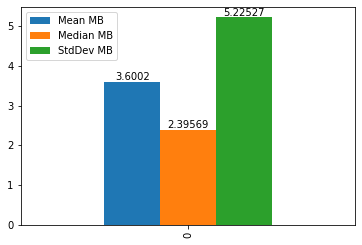

In [70]:
mean = (first1000['Bytes'].mean() / 1e+6)
median = (first1000['Bytes'].median() / 1e+6)
std = (first1000['Bytes'].std() / 1e+6)
data = [mean, median, std]
dfmmms = pd.DataFrame(data)

ax = dfmmms.T.plot(kind='bar')
for container in ax.containers:
    ax.bar_label(container)
ax.legend(['Mean MB', 'Median MB', 'StdDev MB'])
plt.savefig('data/images/graphs/top1000_sizes.png')
plt.show()


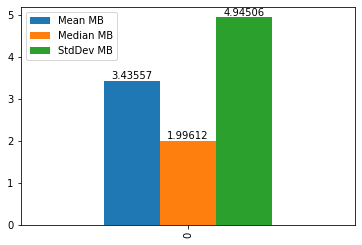

In [71]:
mean = (last1000['Bytes'].mean() / 1e+6)
median = (last1000['Bytes'].median() / 1e+6)
std = (last1000['Bytes'].std() / 1e+6)
data = [mean, median, std]
dfmmms = pd.DataFrame(data)

ax = dfmmms.T.plot(kind='bar')
for container in ax.containers:
    ax.bar_label(container)
ax.legend(['Mean MB', 'Median MB', 'StdDev MB'])
plt.savefig('data/images/graphs/bottom1000_sizes.png')
plt.show()

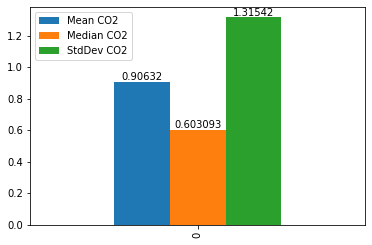

In [72]:
mean = (first1000['Statistics: CO2 Grams, Grid'].mean())
median = (first1000['Statistics: CO2 Grams, Grid'].median())
std = (first1000['Statistics: CO2 Grams, Grid'].std())
data = [mean, median, std]
dfmmms = pd.DataFrame(data)

ax = dfmmms.T.plot(kind='bar')
for container in ax.containers:
    ax.bar_label(container)
ax.legend(['Mean CO2', 'Median CO2', 'StdDev CO2'])
plt.savefig('data/images/graphs/top1000_co2s.png')
plt.show()

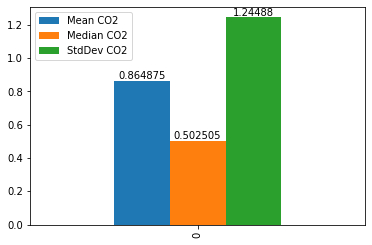

In [73]:
mean = (last1000['Statistics: CO2 Grams, Grid'].mean())
median = (last1000['Statistics: CO2 Grams, Grid'].median())
std = (last1000['Statistics: CO2 Grams, Grid'].std())
data = [mean, median, std]
dfmmms = pd.DataFrame(data)

ax = dfmmms.T.plot(kind='bar')
for container in ax.containers:
    ax.bar_label(container)
ax.legend(['Mean CO2', 'Median CO2', 'StdDev CO2'])
plt.savefig('data/images/graphs/bottom1000_co2s.png')
plt.show()

### For "Hosting Type"

In [74]:
ghtable = pd.pivot_table(data=df, index=['Green Hosting'], aggfunc=np.sum)

TypeError: unhashable type: 'DataFrame'

In [ ]:
ghtable = ghtable.reindex(columns=['Bytes', 'Statistics: Energy (KWG)', 'Statistics: CO2 Grams, Grid', 'Statistics: CO2 Litres, Grid'])
ghtable

NameError: name 'ghtable' is not defined

In [75]:
df["Green Hosting"].value_counts()

unknown    25708
True       24326
Name: Green Hosting, dtype: int64

# Discussion

In [76]:
b = df["Bytes"].sum()
ab = df["Statistics: Adjusted Bytes"].sum()

print((ab/b) * 100)

75.49999999999999
